# Bach Segment Slices using knn and save it to the output directory with and without threshold

[203.03023256 226.82392027 200.24186047]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\321546_2024-03-07_13_17_23.0_slice39.png


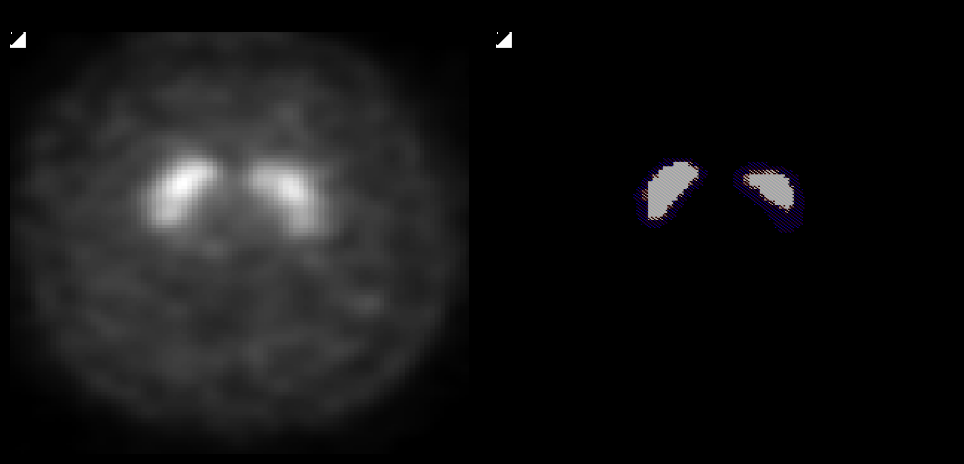

[213.3158002 213.3088685 201.3891947]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\4140_2013-04-09_13_52_29.0_slice41.png


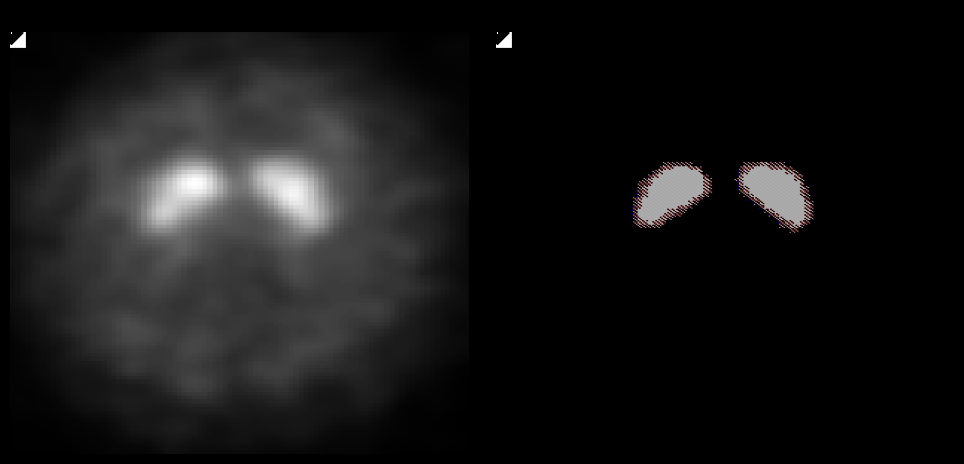

[193.26920011 192.35583311 210.36566569]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3859_2011-08-25_12_32_56.0_slice38.png


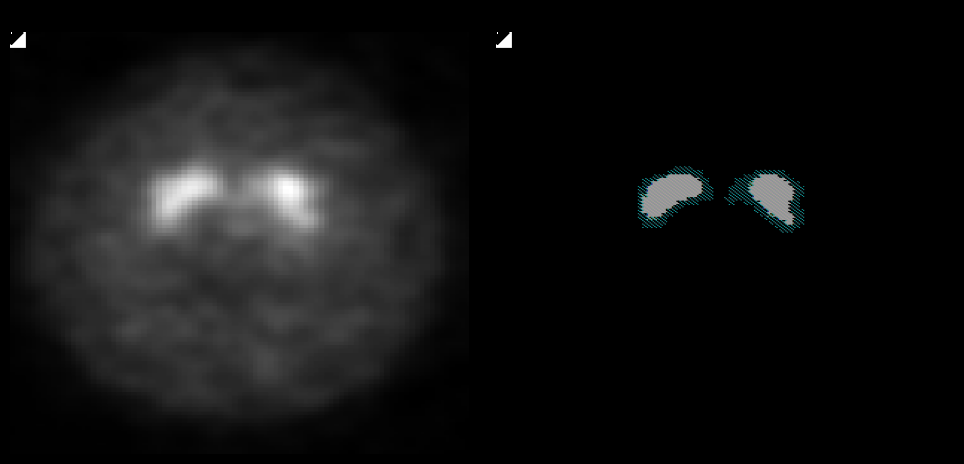

[206.12991339 227.41105929 203.34943371]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\103467_2021-09-03_11_27_43.0_slice37.png


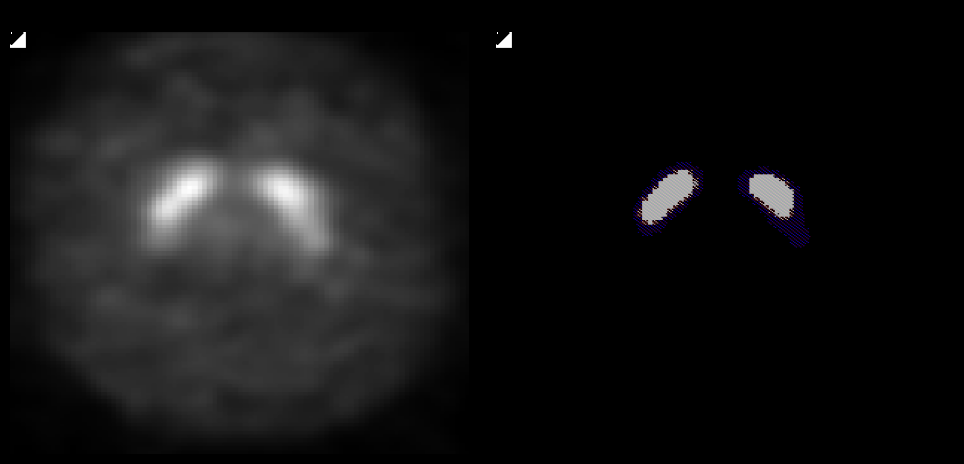

[199.88856045 199.68844221 213.22642625]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3804_2012-07-24_12_59_07.0_slice38.png


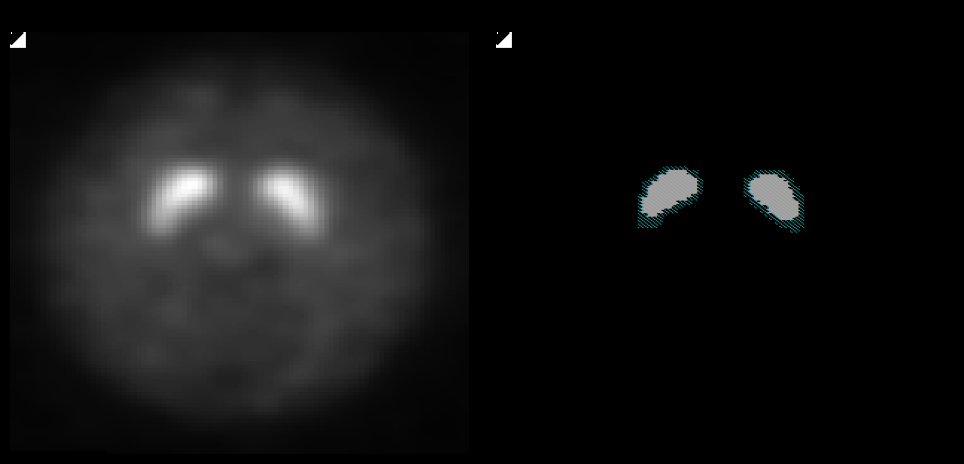

[207.14969709 206.53136603 202.33711159]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3457_2011-08-11_15_22_55.0_slice44.png


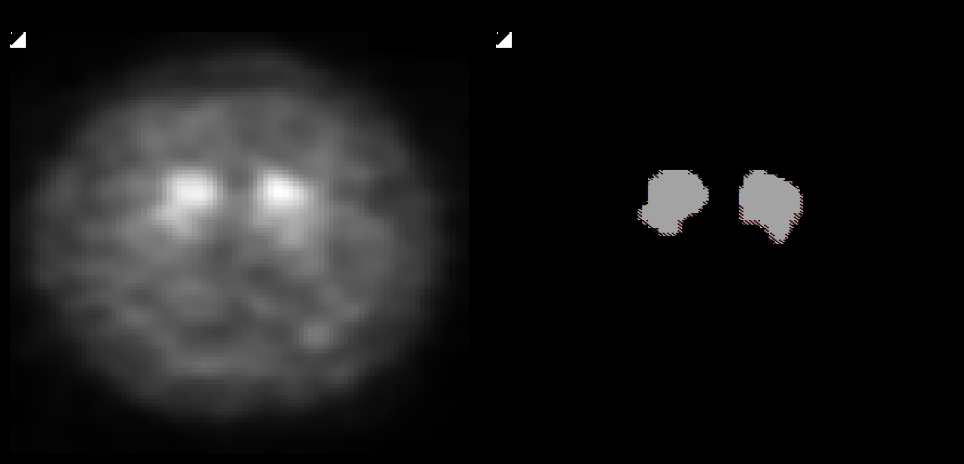

[202.69177127 224.55020921 201.263947  ]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3656_2011-07-13_15_02_32.0_slice41.png


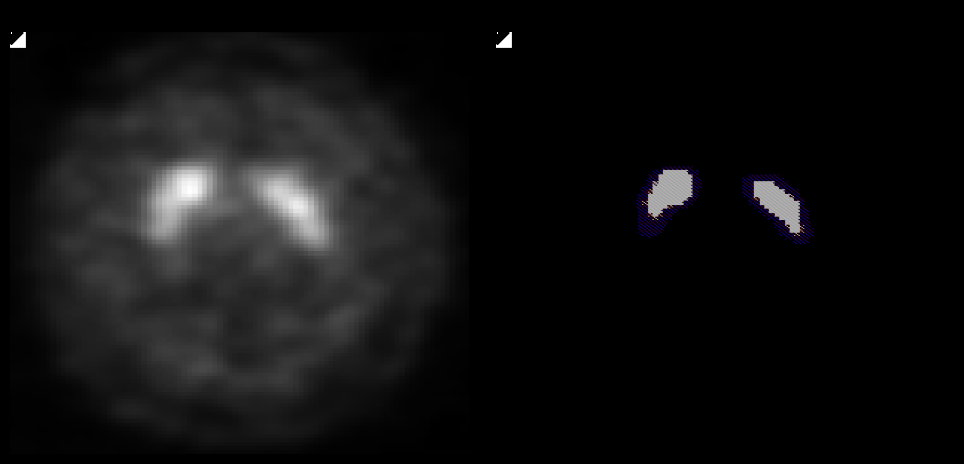

[185.80960086 185.07632147 226.01132686]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\140451_2022-02-10_12_13_54.0_slice41.png


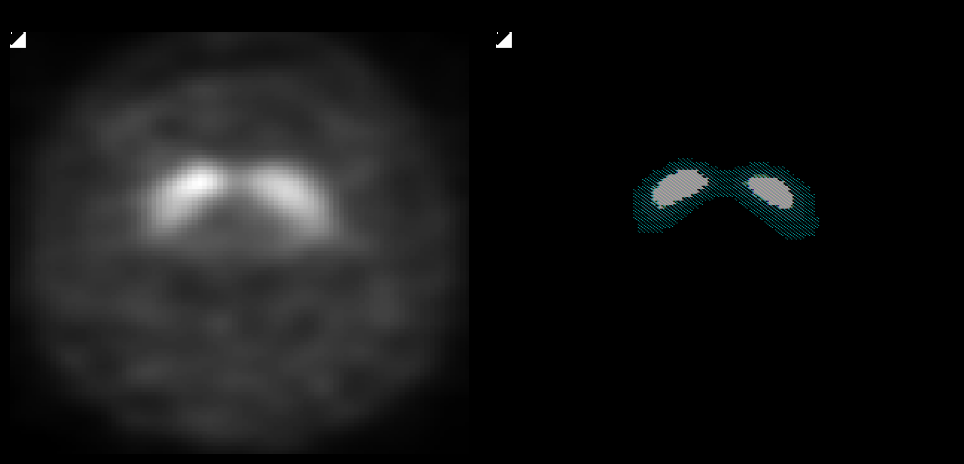

[209.59031847 226.25503185 208.09452229]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\130190_2021-12-15_13_47_05.0_slice40.png


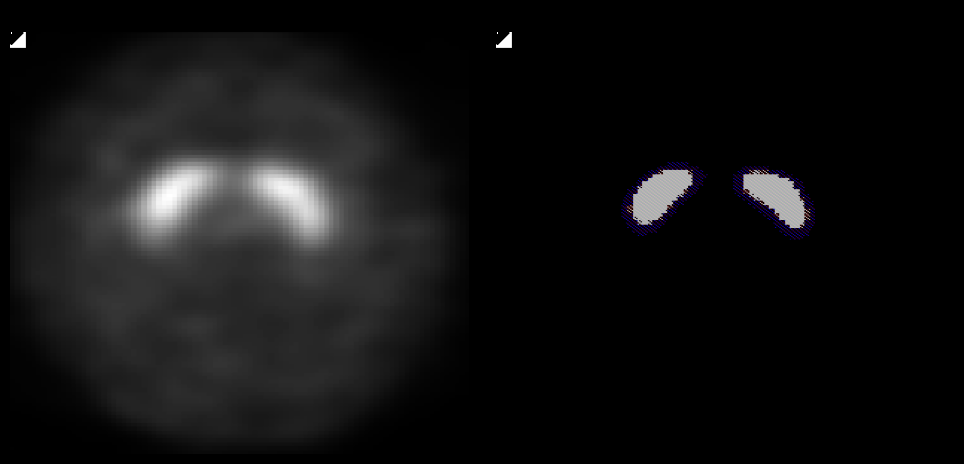

[212.07032024 228.62892044 212.50016507]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\179510_2024-04-05_13_46_34.0_slice44.png


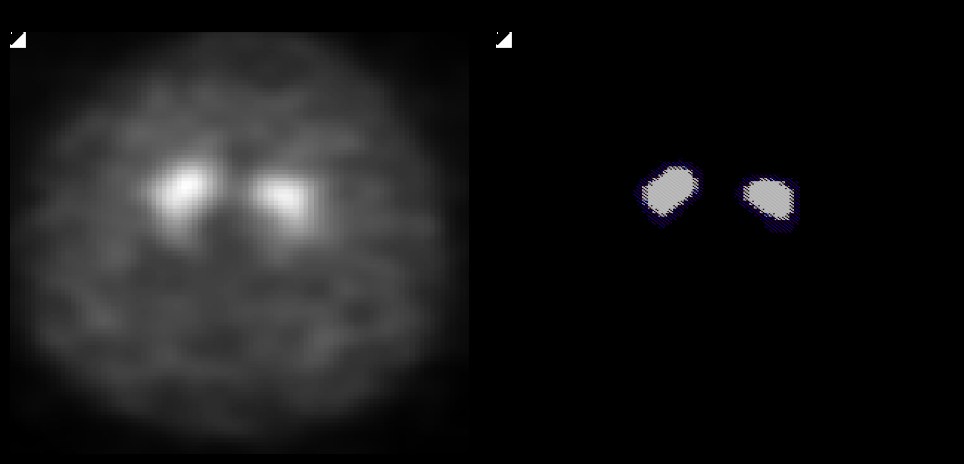

[206.21177619 206.16330514 226.76154847]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\165043_2022-10-12_15_16_53.0_slice40.png


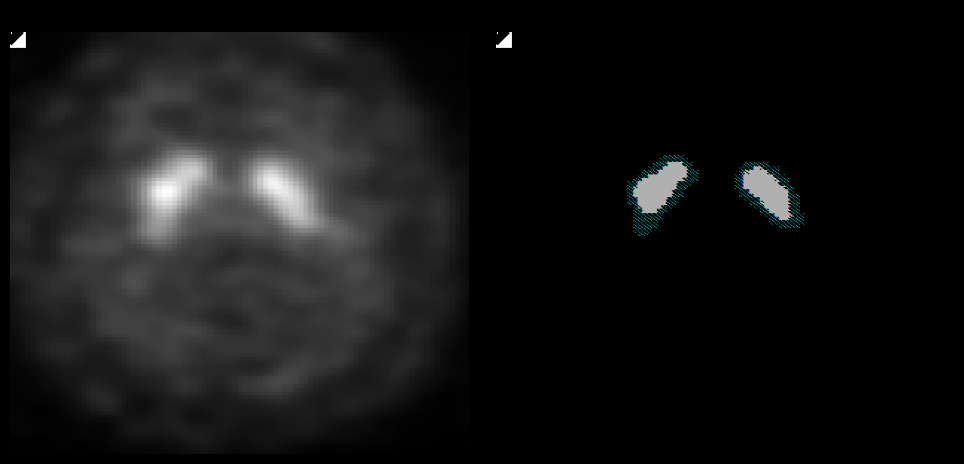

[209.08244379 190.85055644 208.1626164 ]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3217_2011-08-25_14_31_56.0_slice39.png


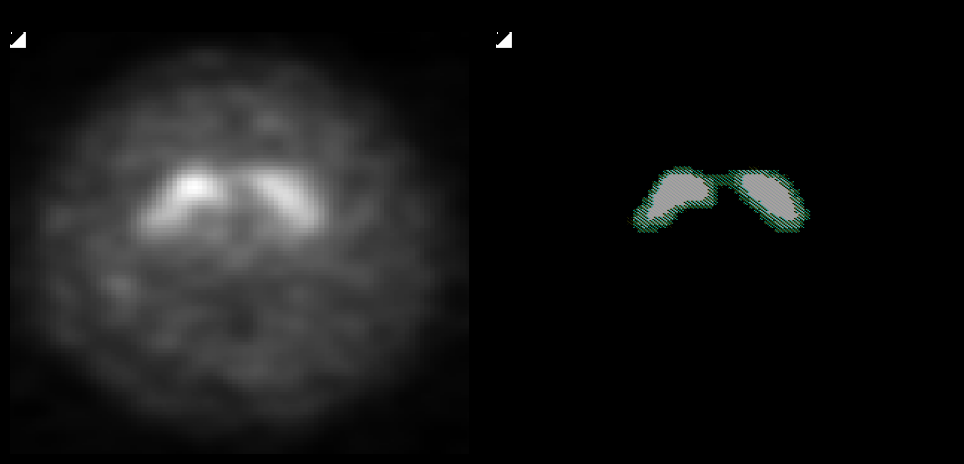

[207.47225474 207.43057832 207.46733786]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3221_2011-12-01_13_34_56.0_slice40.png


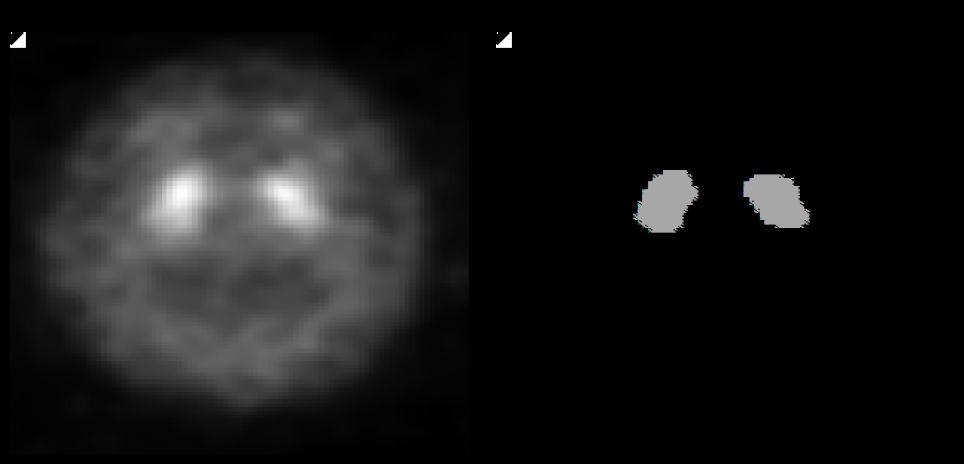

[196.61734694 206.18168934 198.6978458 ]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3109_2011-08-11_11_45_47.0_slice43.png


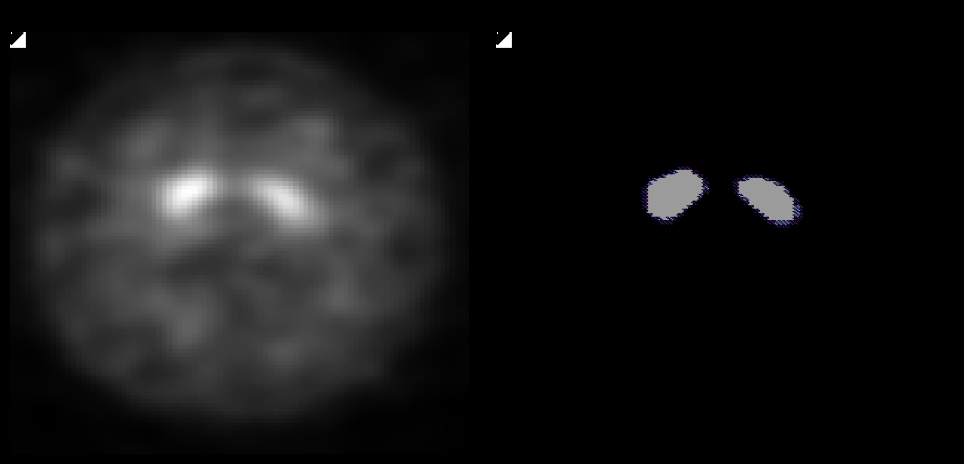

[202.99068545 207.04275137 202.61261046]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3350_2011-08-31_13_09_09.0_slice41.png


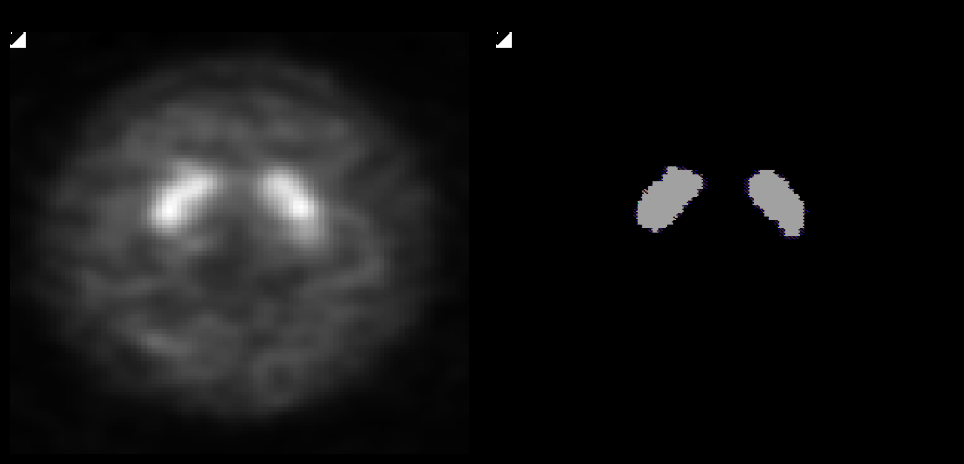

[201.78274605 198.68894289 199.03207776]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3213_2011-08-04_14_19_01.0_slice39.png


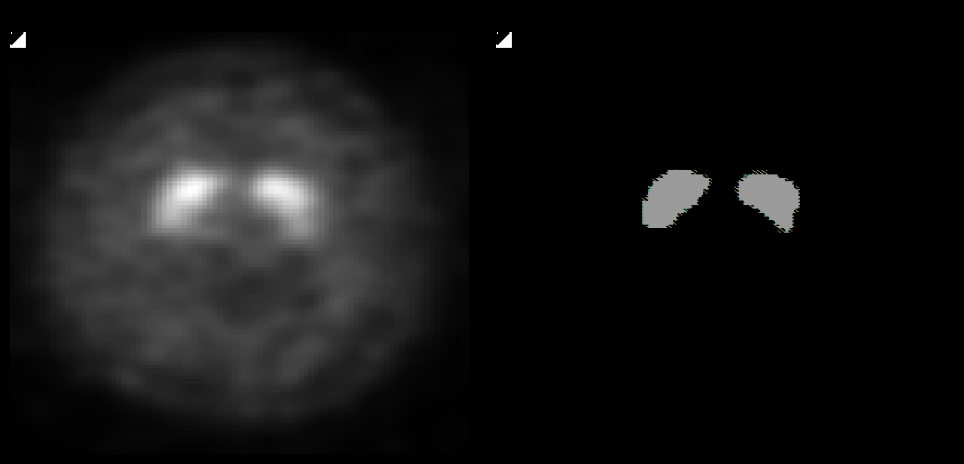

[207.35018868 208.62113208 187.30037736]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3204_2010-12-23_14_56_17.0_slice40.png


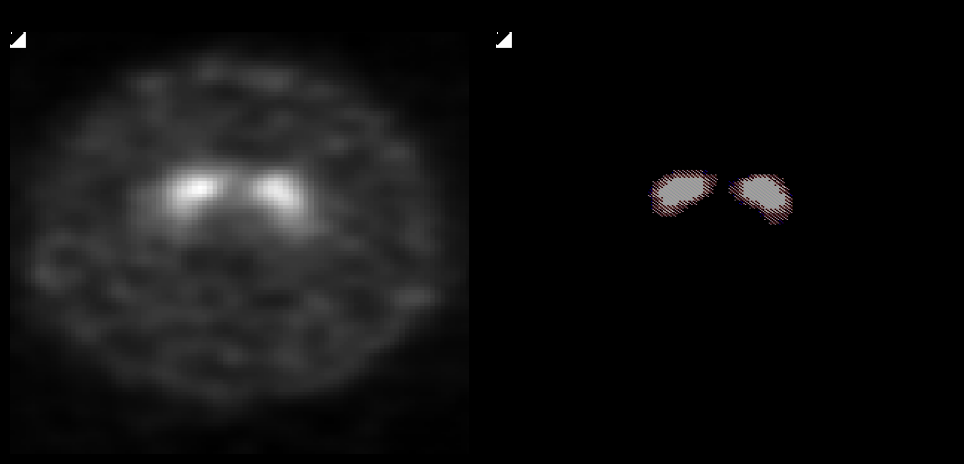

[202.94812465 209.5377869  209.37618959]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3009_2011-09-22_15_54_32.0_slice40.png


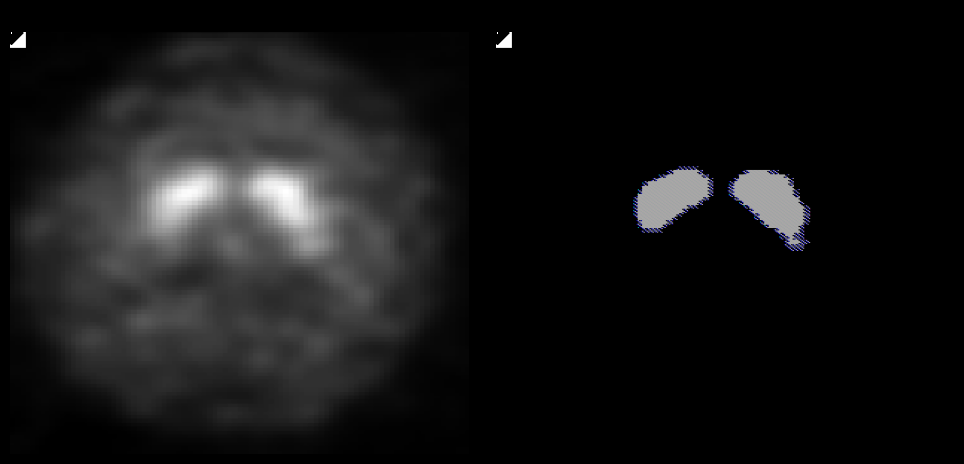

[205.21852948 206.6899613  199.78898247]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3668_2013-04-26_12_25_29.0_slice39.png


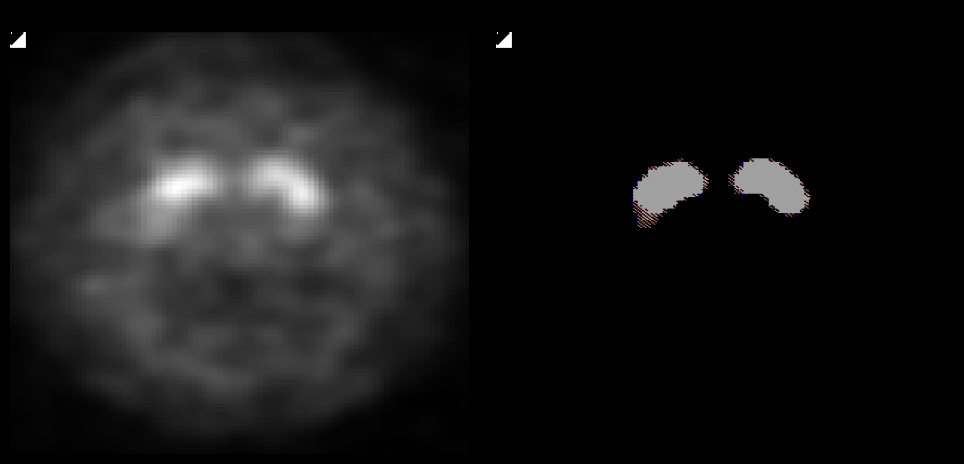

[208.7005468  226.97008684 207.69604374]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3523_2011-12-06_15_16_12.0_slice39.png


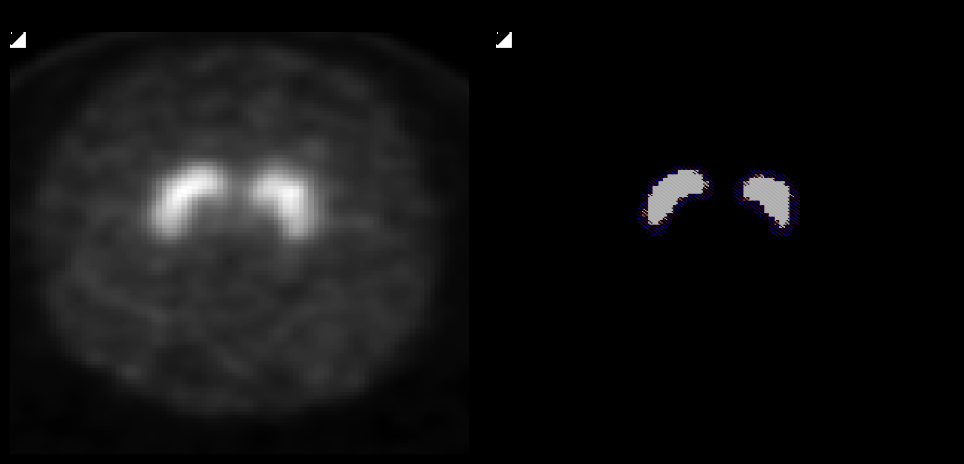

[197.2426203  206.47068338 206.65103114]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3966_2013-02-07_16_22_39.0_slice44.png


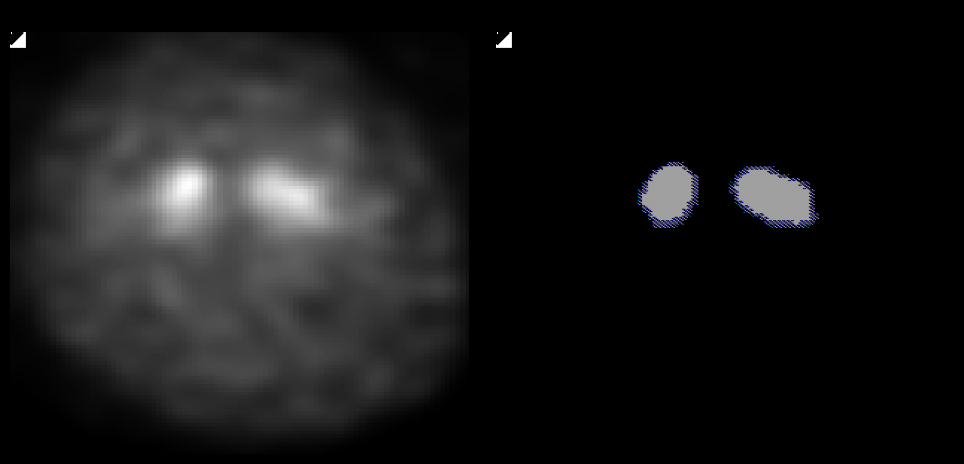

[192.67645607 205.59402764 205.02615992]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\102366_2021-07-21_16_11_13.0_slice43.png


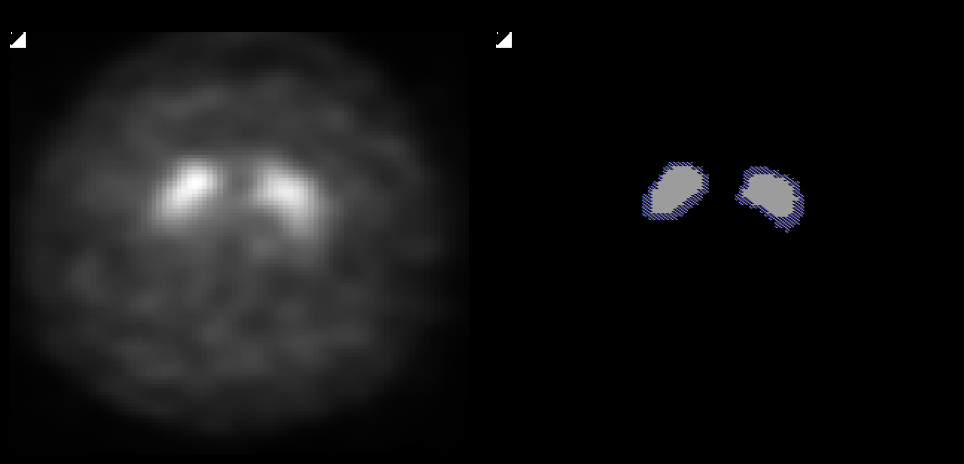

[204.18272529 225.19426255 201.96289367]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3966_2013-02-07_16_22_39.0_slice39.png


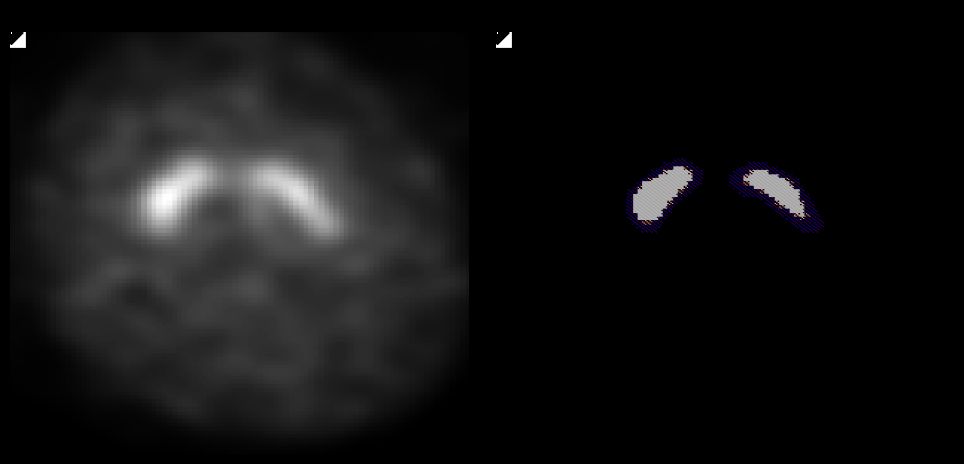

[209.52575488 208.27069272 233.03197158]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3457_2011-08-11_15_22_55.0_slice41.png


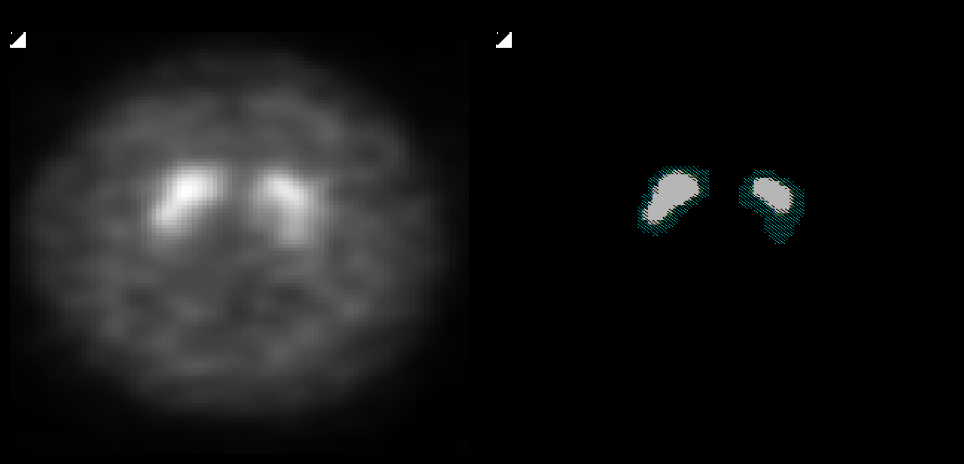

[228.66933251 212.45001538 211.53029837]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\121621_2021-12-17_15_22_54.0_slice41.png


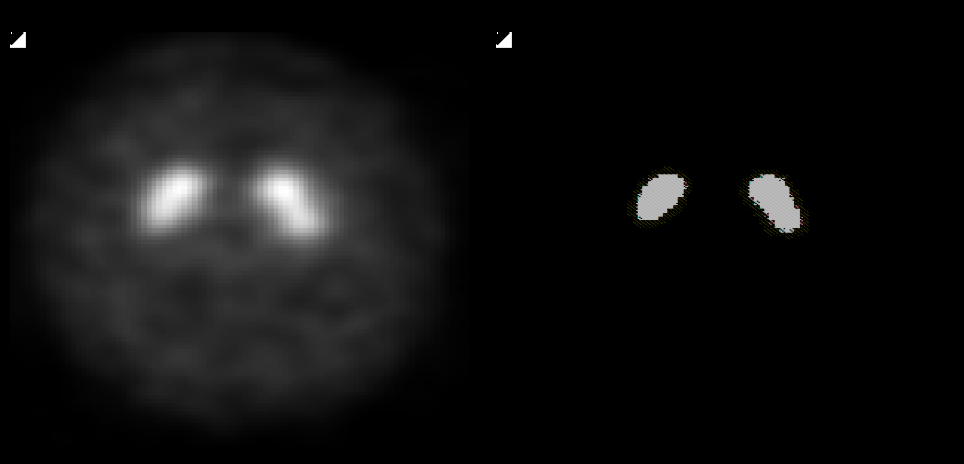

[210.96354635 194.26080108 211.02880288]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3369_2011-09-08_14_14_59.0_slice43.png


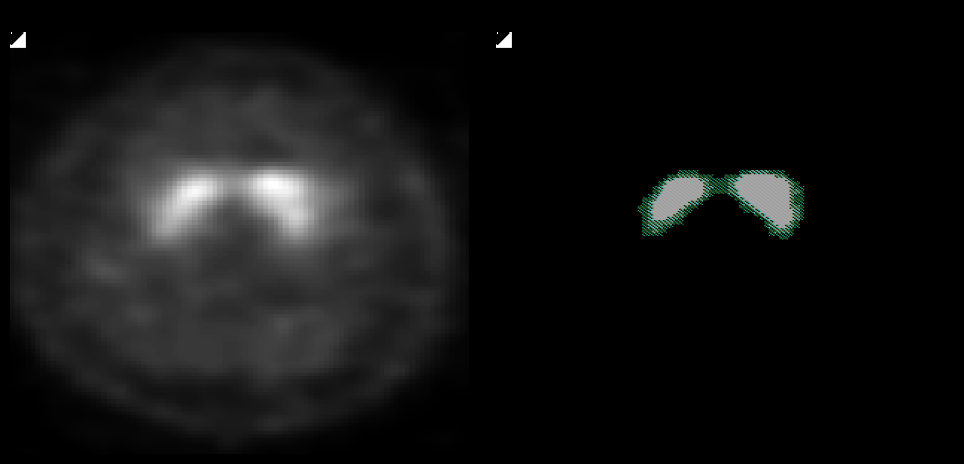

[226.35496317 200.38126973 200.32655209]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3300_2011-01-06_14_09_26.0_slice44.png


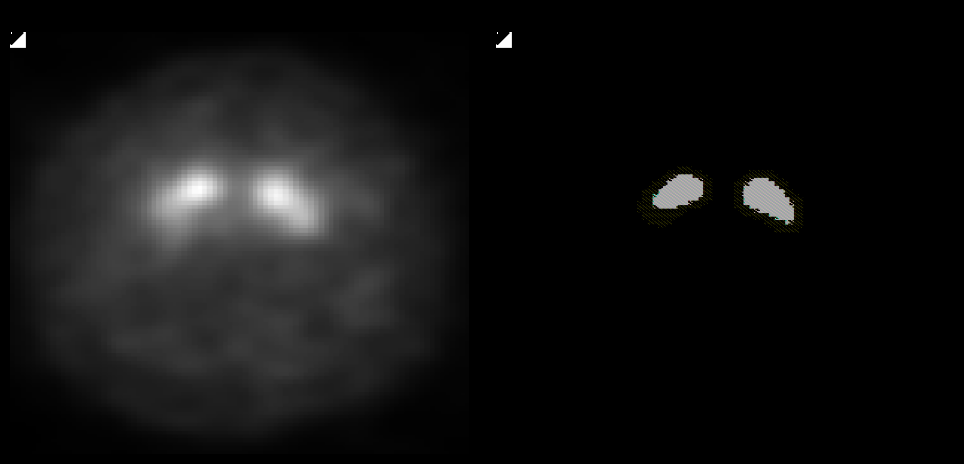

[211.84661017 211.75564972 199.49237288]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3768_2012-12-12_15_38_03.0_slice39.png


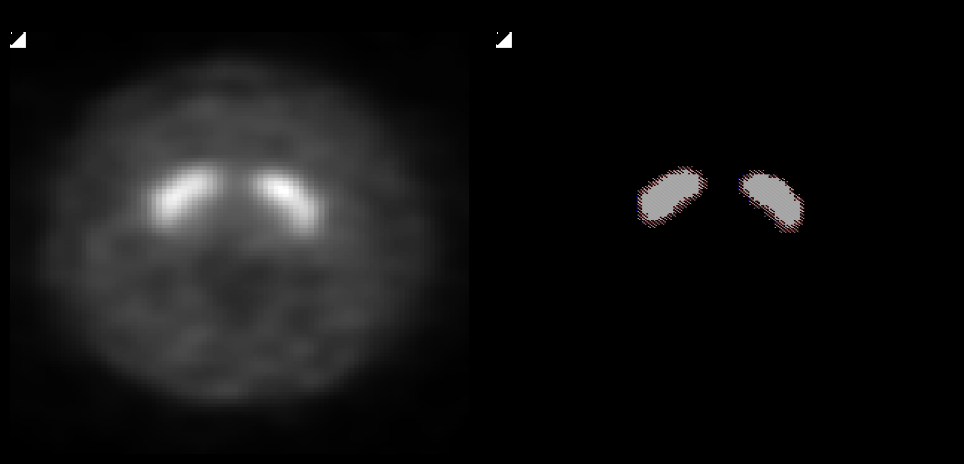

[210.37357955 189.60061553 210.8671875 ]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\128335_2021-12-17_13_47_12.0_slice37.png


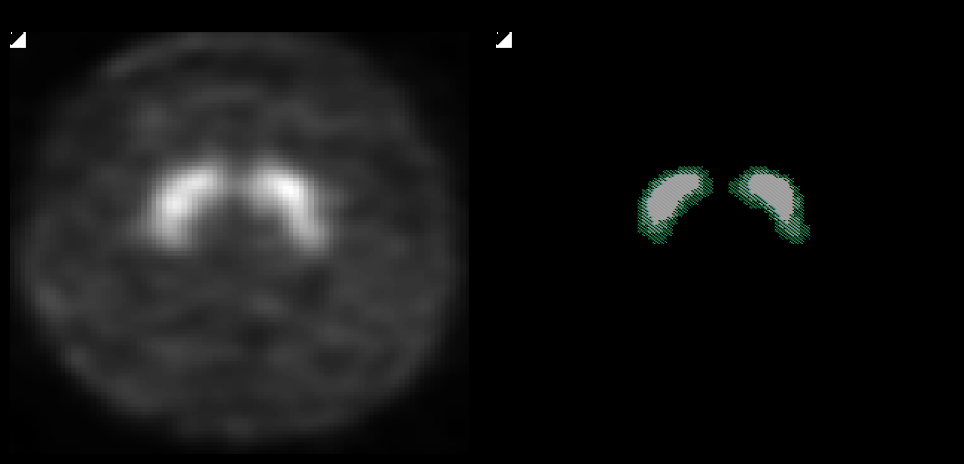

[207.82531969 208.04475703 188.94219949]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3453_2010-11-18_14_49_13.0_slice38.png


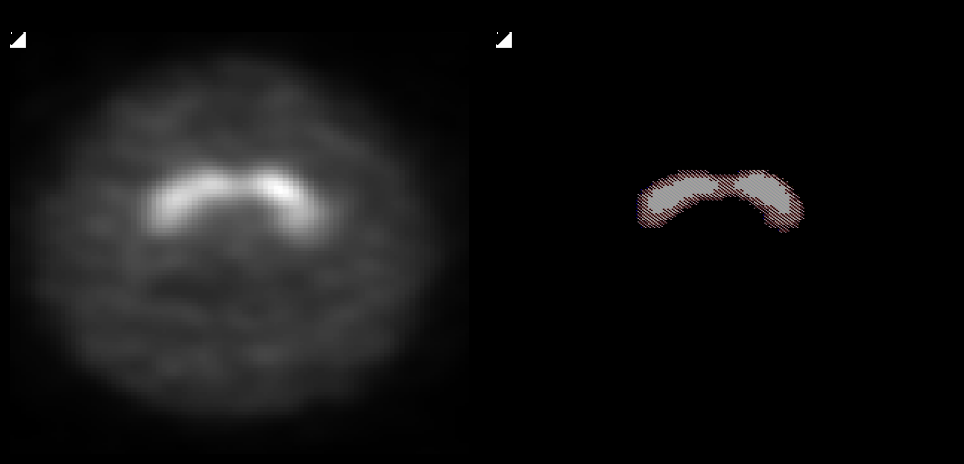

[208.11343416 198.23954626 206.66192171]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\311008_2024-03-06_15_04_08.0_slice42.png


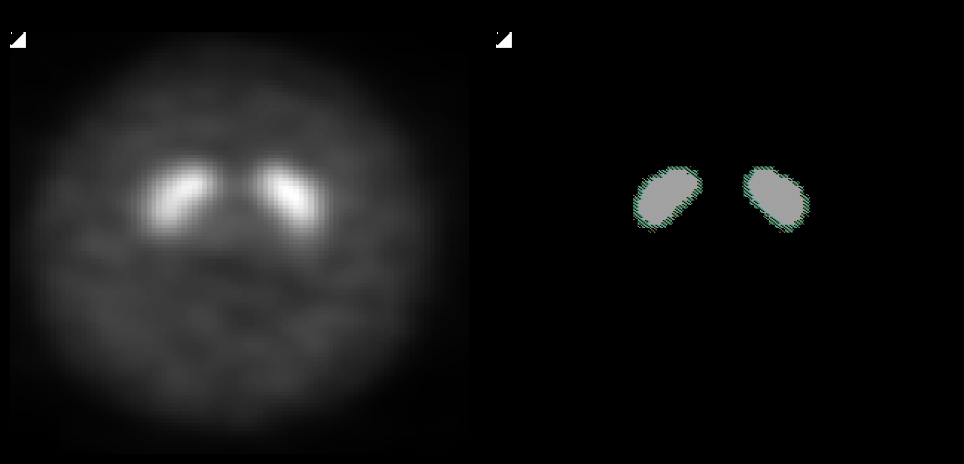

[205.80541353 205.08511278 190.18616541]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3656_2011-07-13_15_02_32.0_slice37.png


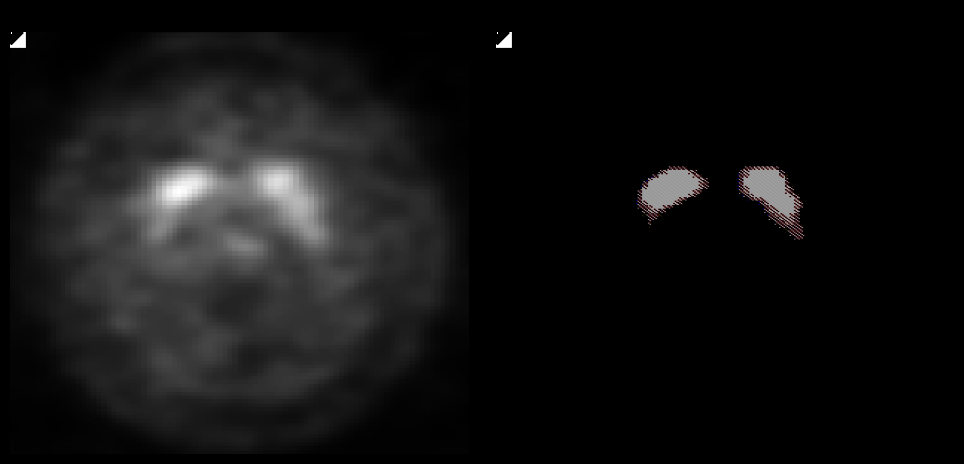

[212.79029536 201.11329114 212.78670886]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\293209_2023-09-29_14_32_59.0_slice40.png


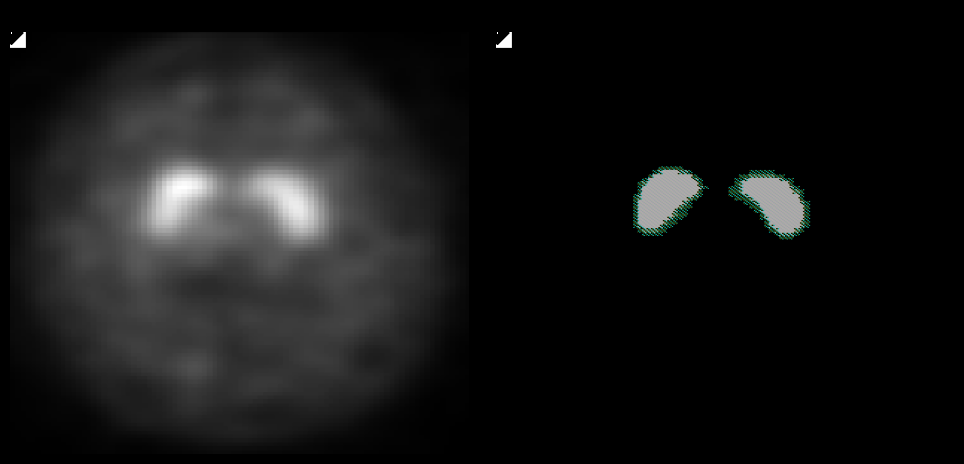

[206.71317614 206.53925104 185.39889043]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3515_2011-06-29_15_31_27.0_slice41.png


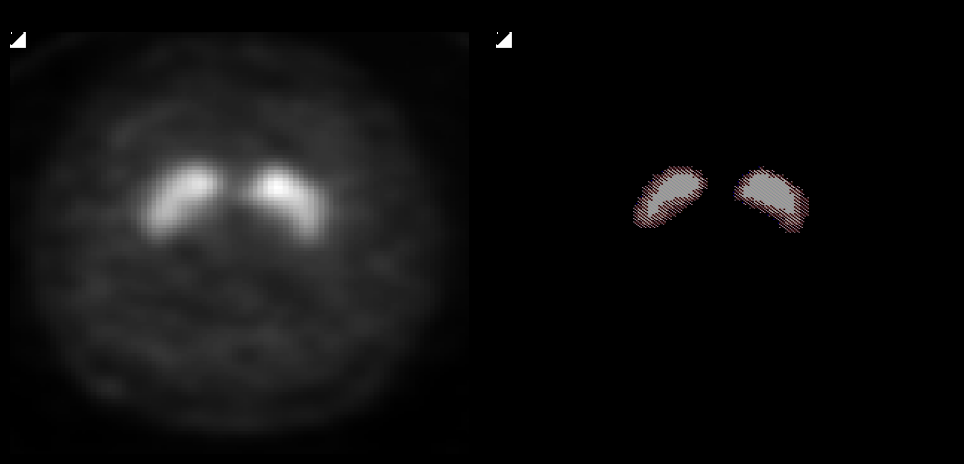

[200.54534058 201.55077309 207.13936481]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3310_2011-12-08_15_10_18.0_slice43.png


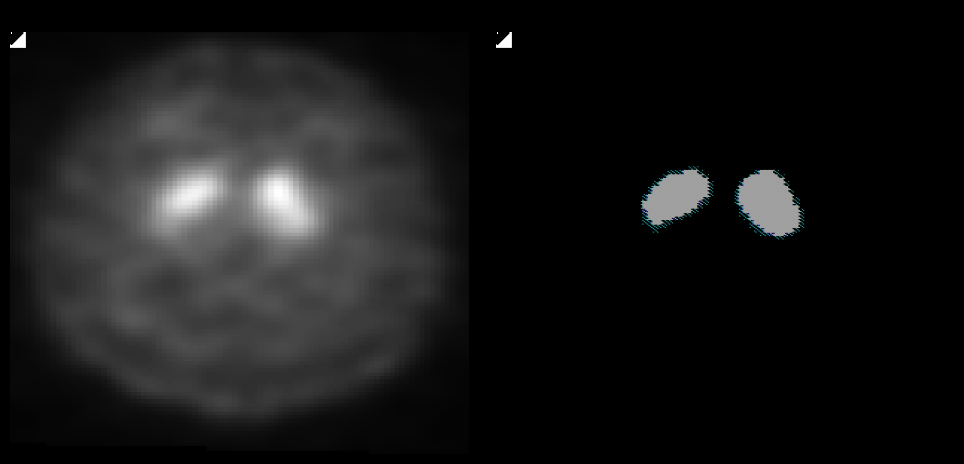

[211.25465426 213.21121454 211.68949468]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3765_2012-12-06_15_09_17.0_slice44.png


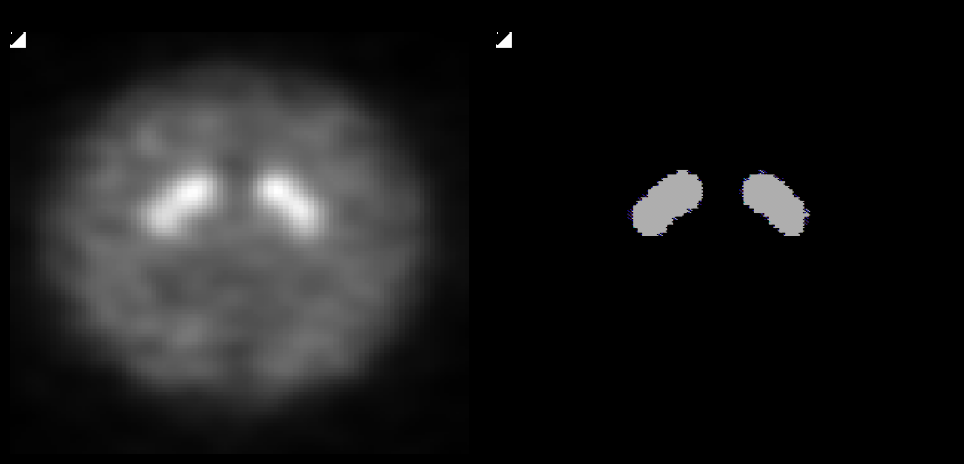

[206.15374376 225.54009983 205.15973378]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3301_2011-01-13_14_06_07.0_slice39.png


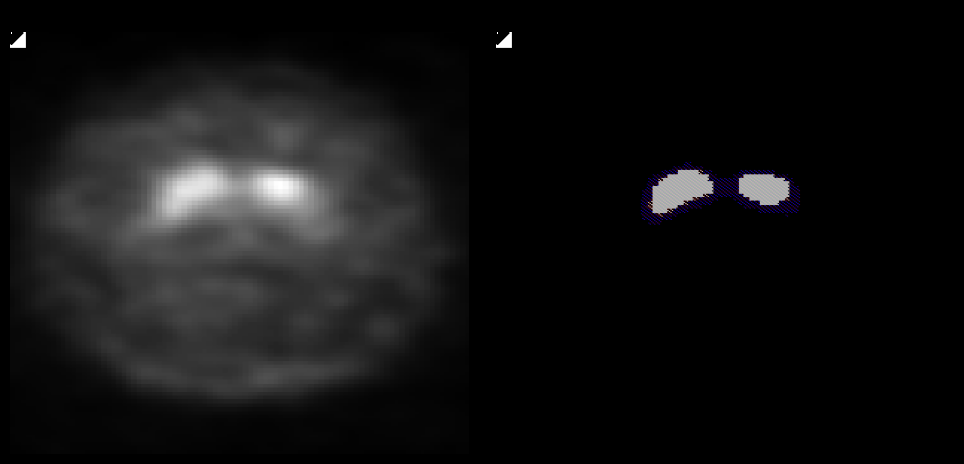

[226.29240924 211.34719472 209.56435644]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3029_2013-04-19_11_48_43.0_slice43.png


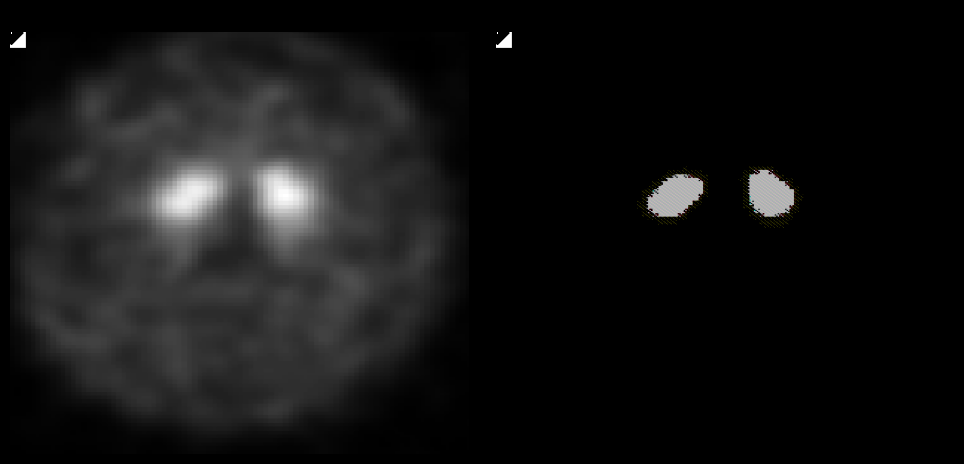

[206.86685714 206.454      225.61114286]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\4140_2013-04-09_13_52_29.0_slice38.png


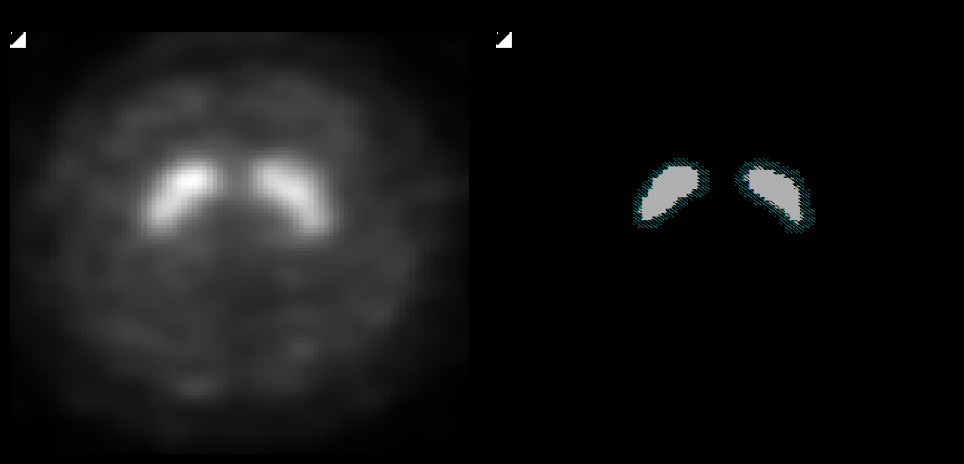

[213.52067705 213.52240816 201.02981343]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\317548_2024-03-20_12_44_32.0_slice40.png


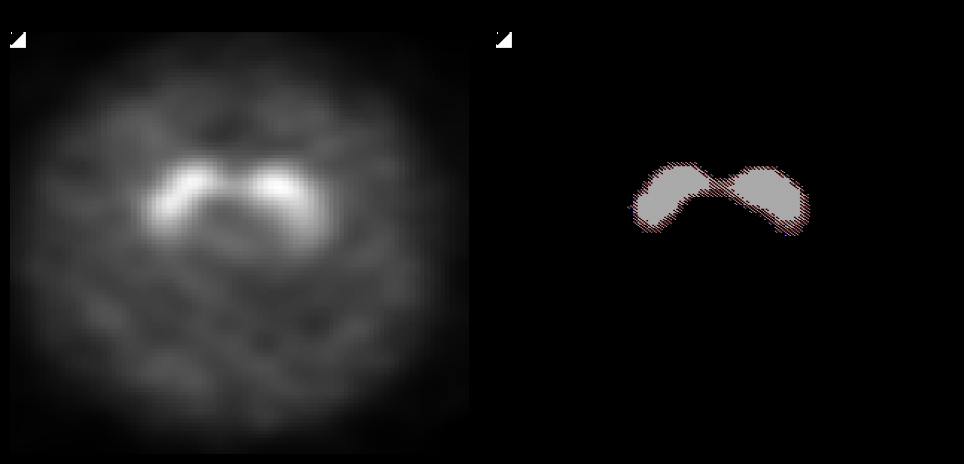

[203.34560144 226.13285458 203.28545781]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3057_2011-01-13_15_48_34.0_slice43.png


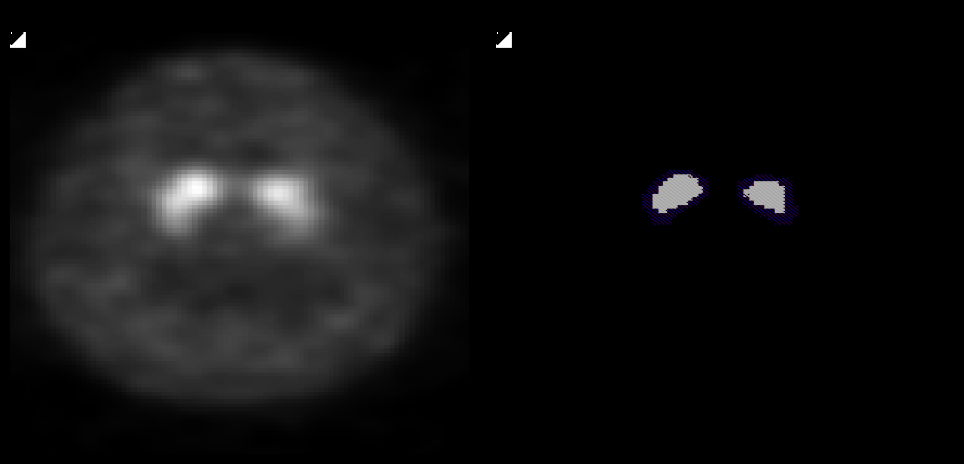

[205.91499283 229.57998565 205.34289813]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3208_2011-07-20_13_42_49.0_slice39.png


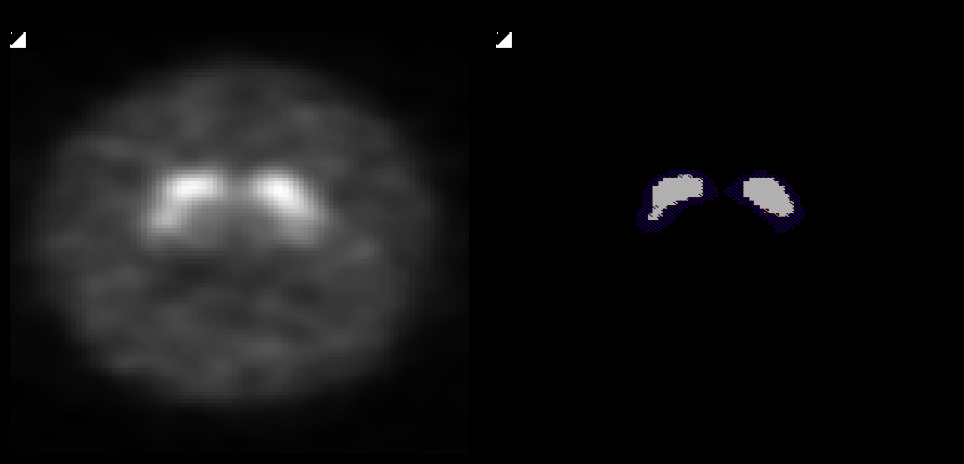

[205.6234786  209.43580683 208.92363565]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\102381_2021-08-03_14_58_17.0_slice43.png


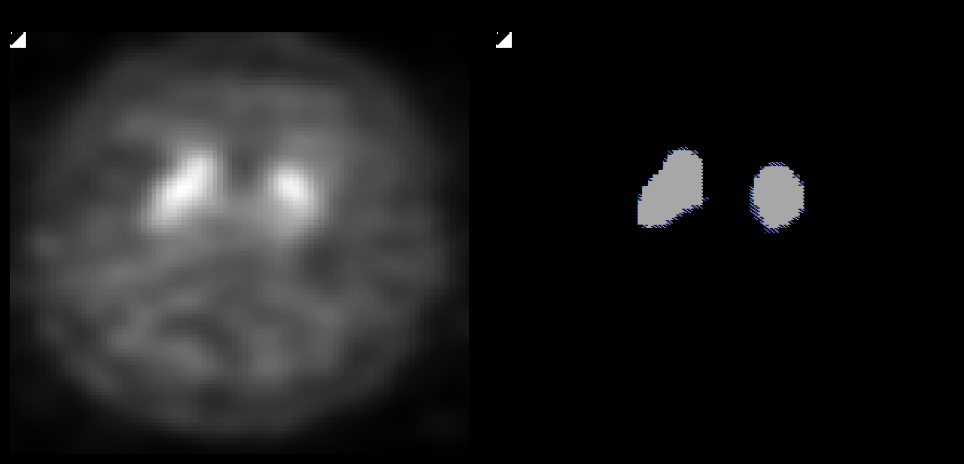

[201.26246934 234.26982829 200.94889616]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\240386_2023-08-14_13_36_27.0_slice39.png


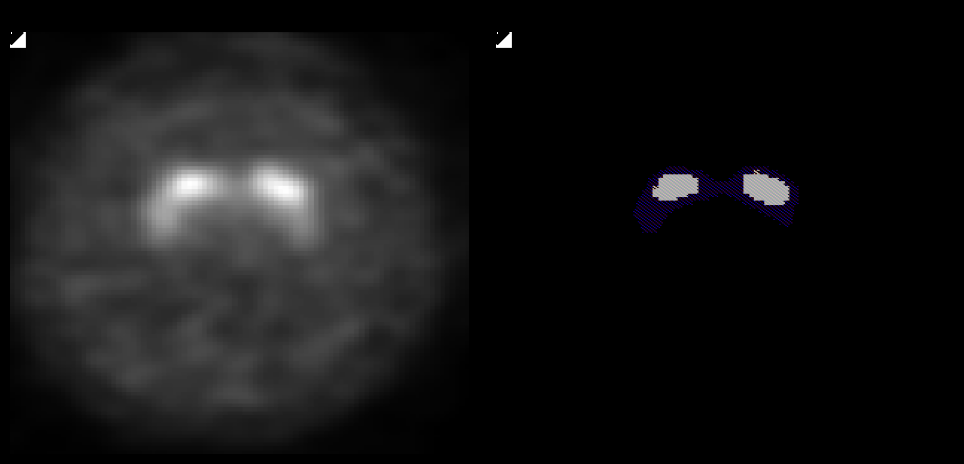

[212.98071496 199.43579492 213.474365  ]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\293060_2023-10-18_16_05_59.0_slice37.png


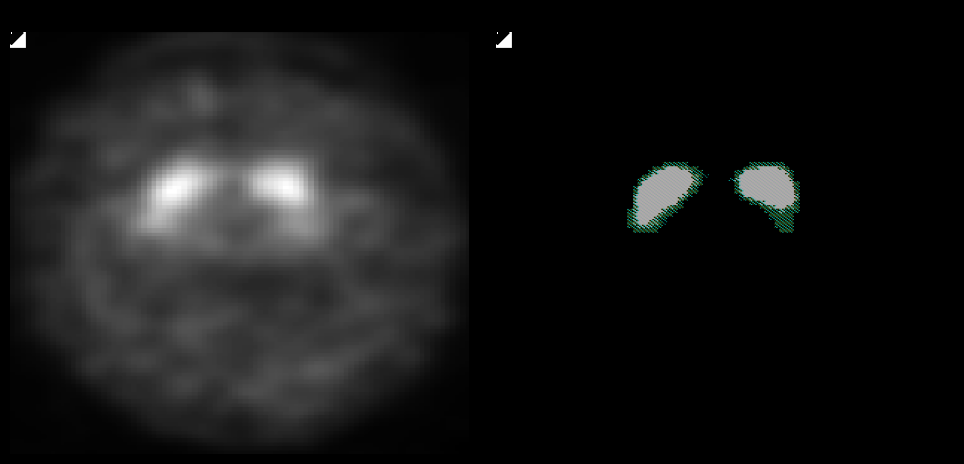

[193.47558109 211.54740141 211.49751893]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3165_2011-07-21_13_33_06.0_slice41.png


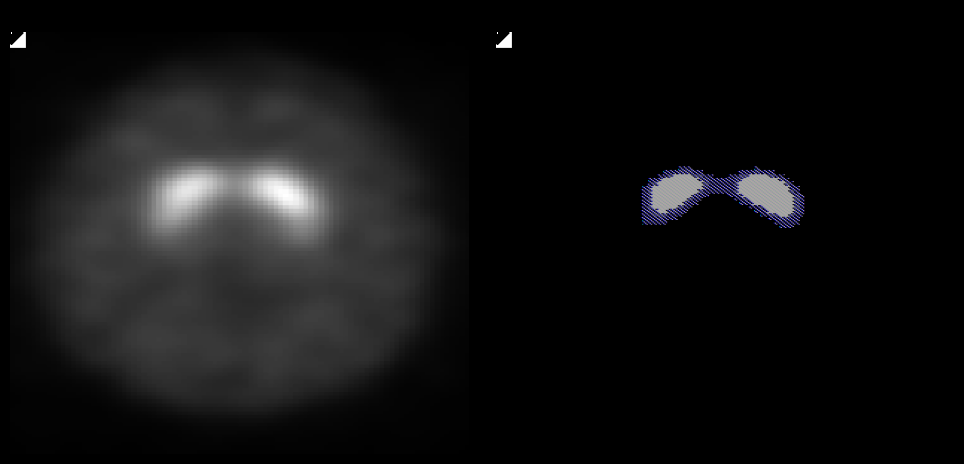

[220.16109215 200.63208191 195.12969283]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3355_2011-06-29_15_13_04.0_slice41.png


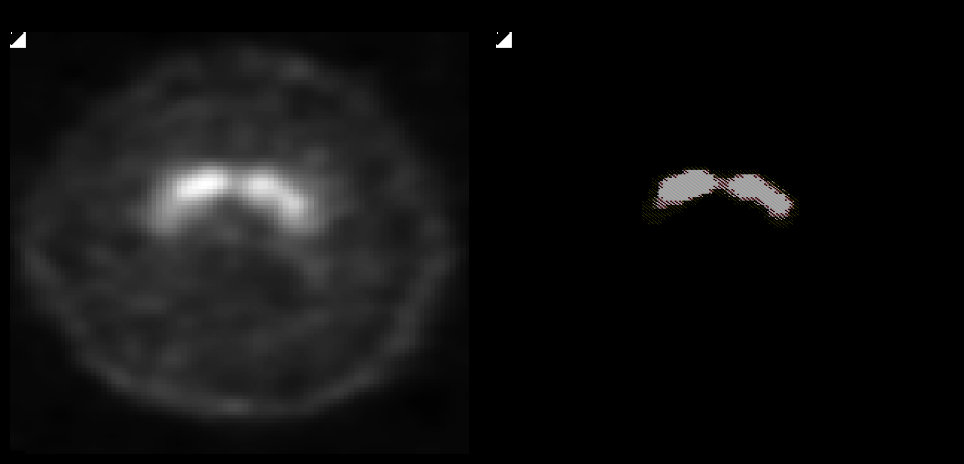

[206.80995056 207.51915946 225.14462299]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3611_2011-08-31_14_49_38.0_slice41.png


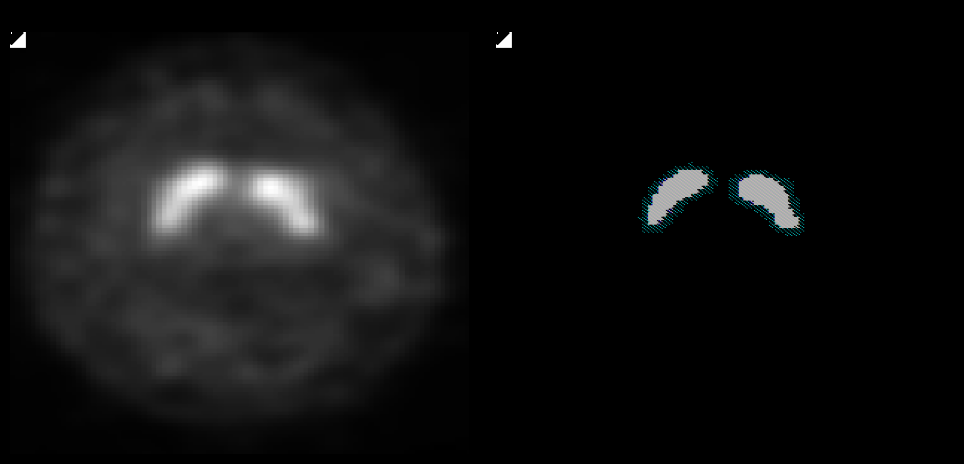

[192.74501992 204.76743028 205.04407371]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\4139_2013-03-19_13_03_00.0_slice41.png


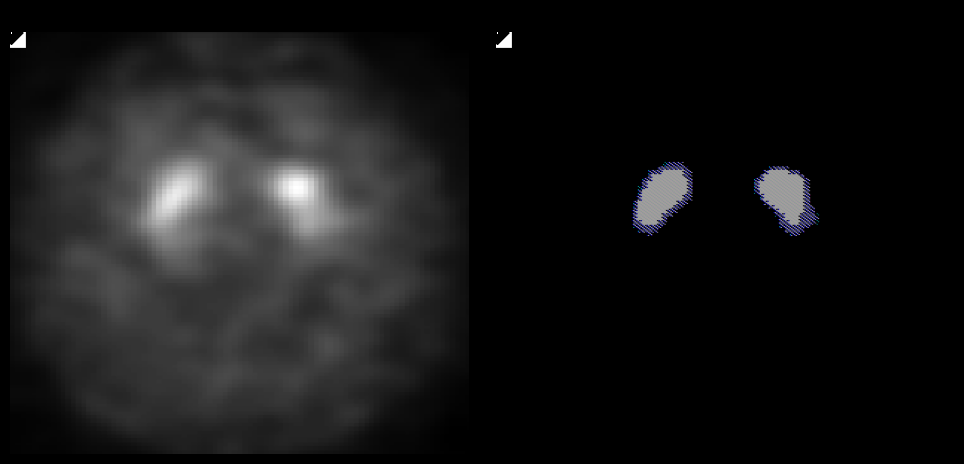

[211.92203083 212.2175884  197.56270777]
Compressed image saved as: B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output\3576_2011-09-22_15_22_49.0_slice39.png


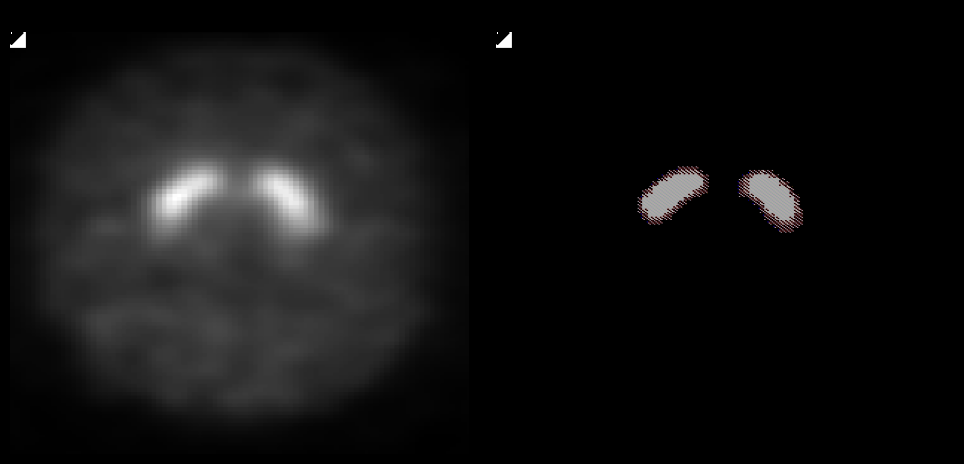

In [21]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def kmeans_image(image_path, num_clusters,threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)    
    # Apply threshold if provided 
    if threshold is not None:
        img_array[img_array < threshold] = 0
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    brightest_cluster_center = np.argmax(np.sum(cluster_centers, axis=1)) 
    a=cluster_centers[brightest_cluster_center]
    print(a)
    
    # largest_centers_indices = np.argsort(np.sum(cluster_centers, axis=1))[::-1][:2]


    modified_cluster_centers = np.zeros_like(cluster_centers)
    # Set the brightest cluster center to its original value
    modified_cluster_centers[brightest_cluster_center] = cluster_centers[brightest_cluster_center]

    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = modified_cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

def process_images(folder_path, num_clusters, num_images,output_folder_paht,threshold=None,):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    
    # Randomly select specified number of images
    for filename in np.random.choice(image_files, num_images, replace=False):
        image_path = os.path.join(folder_path, filename)
        output_image_path=os.path.join(output_folder_paht,filename)
        original_img = Image.open(image_path)
        
        compressed_img = kmeans_image(image_path, num_clusters,threshold)
        compressed_img.save(output_image_path, format='PNG')
        print(f"Compressed image saved as: {output_image_path}")
        
        # Display original image with white border
        fig, axs = plt.subplots(1, 2, figsize=(10, 5),facecolor='black')
        
        axs[0].imshow(original_img, aspect='auto')
        axs[0].set_title('Original Image')
        axs[0].axis('off')
        axs[0].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))
        
        
        # Display compressed image with white border
        axs[1].imshow(compressed_img, aspect='auto')
        axs[1].set_title(f'Compressed Image (K={num_clusters})')
        axs[1].axis('off')
        axs[1].add_patch(Rectangle((0, 0), 1, 1, color="white", fill=True, linewidth=20))
        
        plt.tight_layout(pad=2.0)  # Adjust padding between images
        plt.show()

# Example usage
folder_path = r"B:\Sami Sir Research\Data set\pngimage\hc"
output_folder_paht=r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\output"
threshold = 30
num_clusters = 11  # You can adjust the number of clusters
num_images = 50  # Number of images to select
process_images(folder_path, num_clusters, num_images,output_folder_paht)


# Segment Slices using knn 


[ 5 13 11]


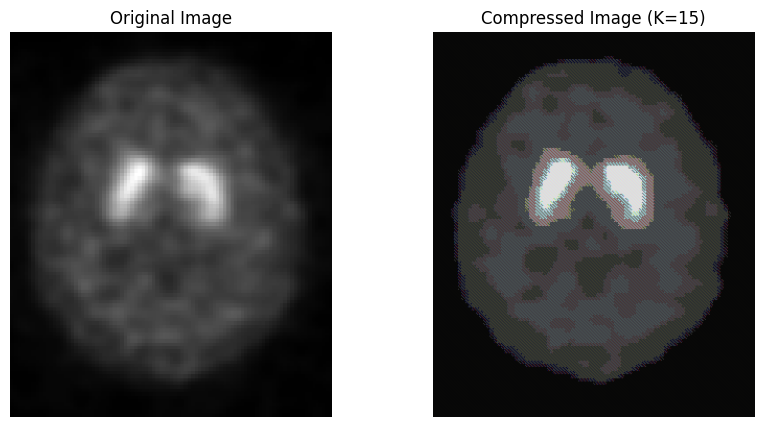

In [2]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    largest_centers_indices = np.argsort(np.sum(cluster_centers, axis=1))[::-1][:3]

    print(largest_centers_indices)
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage
image_path = r"B:\Sami Sir Research\Data set\pngimage\hc\3075_2011-11-01_14_50_54.0_slice41.png"
num_clusters = 15 # You can adjust the number of clusters
compressed_img = kmeans_image(image_path, num_clusters)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters})')
axs[1].axis('off')

plt.show()


# Segment Slices using knn and threshold


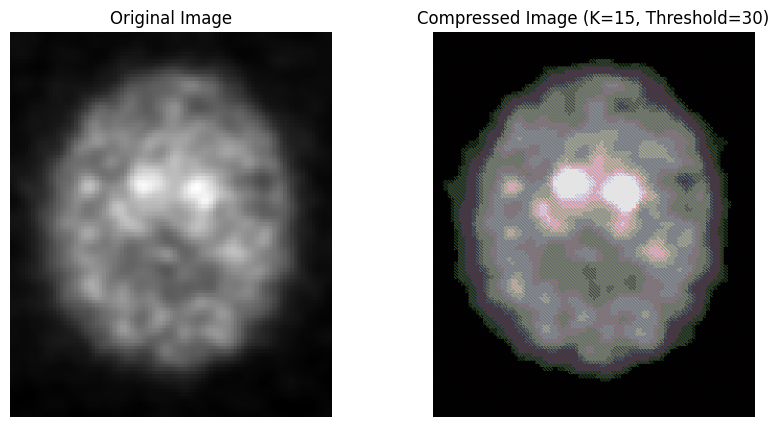

In [96]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_image(image_path, num_clusters, threshold=None):
    # Load the image
    img = Image.open(image_path)
    
    # Convert image to numpy array
    img_array = np.array(img)
    
    # Apply threshold if provided
    if threshold is not None:
        img_array[img_array < threshold] = 0  # Set pixel values below threshold to 0
    
    # Flatten the image array to a 2D array of pixels
    pixels = img_array.reshape((-1, 3))
    
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit KMeans model to the pixels
    kmeans.fit(pixels)
    
    # Get the labels and cluster centers
    labels = kmeans.labels_
    

    cluster_centers = kmeans.cluster_centers_
    
    # Create a new image with the pixel values replaced by cluster centers
    compressed_img_array = cluster_centers[labels].reshape(img_array.shape).astype(np.uint8)
    compressed_img = Image.fromarray(compressed_img_array)
    
    return compressed_img

# Example usage with threshold
image_path = r"B:\Sami Sir Research\Data set\pngimage\pd\3021_2013-06-13_11_43_03.0_slice38.png"
num_clusters = 15  # You can adjust the number of clusters
threshold = 30  # Adjust the threshold value as needed
compressed_img = kmeans_image(image_path, num_clusters, threshold)

# Display original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(Image.open(image_path))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f'Compressed Image (K={num_clusters}, Threshold={threshold})')
axs[1].axis('off')

plt.show()
